In [1]:
#Author : Utkarsh Kulshrestha
#E-mail : kuls.utkarsh1205@gmail.com
#Designation : Artificial Intelligence Engineer
#The algorithm is used for detecting the classes in iris dataset

## Import the Libraries and Dataset

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np  
import pandas as pd  

In [3]:
# url = "Iris.csv"

# # Assign colum names to the dataset
# names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# # Read dataset to pandas dataframe
# dataset = pd.read_csv(url, names=names)  

In [4]:
dataset1 = pd.read_csv("Iris.csv") 
dataset1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#rename the column

In [6]:
dataset1.rename(columns={"SepalLengthCm":"sepal-length",
                        "SepalWidthCm":"sepal-width",
                        "PetalLengthCm":"petal-length",
                        "PetalWidthCm":"petal-width",
                         "Species":"Class"} ,inplace=True)


In [7]:
dataset1

,Id,sepal-length,sepal-width,petal-length,petal-width,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
dataset1.head()  

,Id,sepal-length,sepal-width,petal-length,petal-width,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
dataset1.dtypes

Id                int64
sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
Class            object
dtype: object

## Train-Test Split

In [10]:
# X = dataset.iloc[:, :-1].values  
# y = dataset.iloc[:, 4].values  

In [11]:
# ANOTHER METHOD TO WRITE THE CODE

In [12]:
X = dataset1.drop(['Class'], axis=1)
y = dataset1['Class']

In [13]:
print(X, y)

      Id  sepal-length  sepal-width  petal-length  petal-width
0      1           5.1          3.5           1.4          0.2
1      2           4.9          3.0           1.4          0.2
2      3           4.7          3.2           1.3          0.2
3      4           4.6          3.1           1.5          0.2
4      5           5.0          3.6           1.4          0.2
..   ...           ...          ...           ...          ...
145  146           6.7          3.0           5.2          2.3
146  147           6.3          2.5           5.0          1.9
147  148           6.5          3.0           5.2          2.0
148  149           6.2          3.4           5.4          2.3
149  150           5.9          3.0           5.1          1.8

[150 rows x 5 columns] 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica


In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

## Pre-Processing and Standardization

In [15]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

## K-Nearest Neighbours Classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier 

classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

## Predictions & Evaluations

In [17]:
y_pred = classifier.predict(X_test)  

In [21]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Detection of Optimal Value for K Neighnours

In [19]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [23]:
frame=pd.DataFrame({"cluster":range(1,40),"SSE":error})

Text(0, 0.5, 'Inertia')

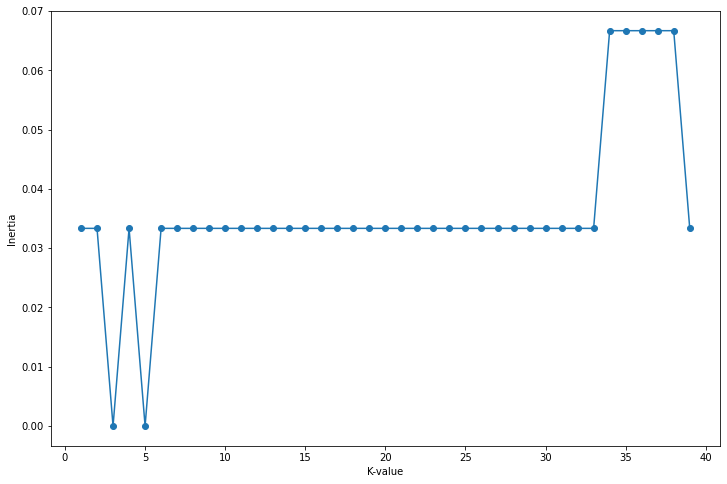

In [25]:
plt.figure(figsize=(12,8))
plt.plot(frame["cluster"],frame["SSE"],marker="o")
plt.xlabel("K-value")
plt.ylabel("Inertia")

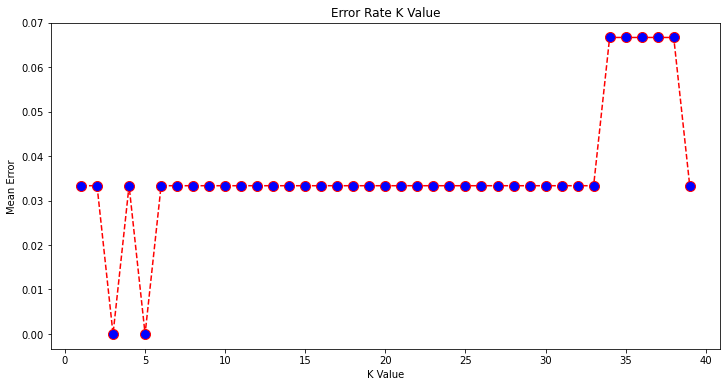

In [20]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()